## 1. Setup and Dependencies

In [24]:
import pandas as pd
import joblib
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

## 2. Load vectorizer and model

In [25]:
vectorizer = joblib.load('../models/tfidf_vectorizer.pkl')
model = joblib.load('../models/logistic_regression_model.pkl')

## 3. Load processed data

In [26]:
df = pd.read_csv('../data/processed/cleaned_data.csv')
print(df.columns)

Index(['Unnamed: 0.1', 'Unnamed: 0', 'text', 'label', 'cleaned_text'], dtype='object')


## 4. Transform cleaned text into vector

In [27]:
X = vectorizer.transform(df['cleaned_text'])

## 5. Split into train/test

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, df['label'], test_size=0.2, random_state=42, stratify=df['label']
)

# 6. Predict on the test set and evaluate

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       118
           1       0.60      0.35      0.44        17

    accuracy                           0.89       135
   macro avg       0.76      0.66      0.69       135
weighted avg       0.87      0.89      0.88       135

Confusion Matrix:
 [[114   4]
 [ 11   6]]


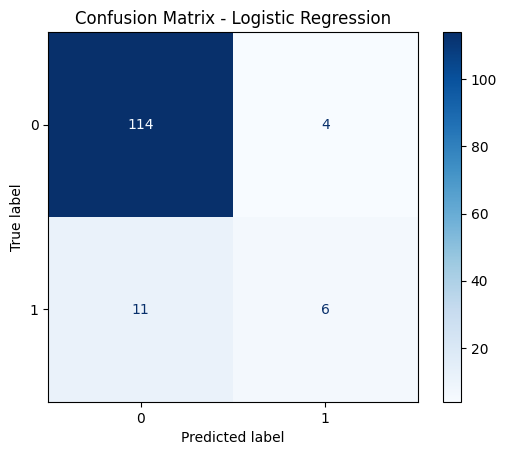

In [29]:
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
disp.ax_.set_title("Confusion Matrix - Logistic Regression")
plt.show()